# **RGB Image classification**

This tutorial shows how to classify images into 3 categories either Red, Green or Blue. It builds an image classifier using a tf.keras.Sequential model and load data using tf.keras.preprocessing.image.ImageDataGenerator.

Building data input pipelines using the tf.keras.preprocessing.image.ImageDataGenerator class to efficiently work with data on disk to use with the model.

This notebook follows a basic machine learning workflow:

Examine and understand data
Build an input pipeline
Build the model
Train the model
Test the model
Improve the model and repeat the process

# Instruction to run this Notebook:
1. Load colors.csv & colors2.csv
2. Generate Dataset or Upload Dataset

# Import packages

In [1]:
import tensorflow as tf
!pip install tensorflow==2.2.0 #for certain new functions to run easily

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [0]:
from tensorflow.keras.optimizers import SGD

# Load data/ Structure of Generate Data

You could either generate data or upload it.
If you are directly uploading the folder don't run the 3 cells of data generation below.

Here I am generating mono-solid colored image with the help of color_img function.

The dataset has the following directory structure:

dataset
```
|__ train
    |______ red_dir: [red-0.jpg, red-1.jpg, red-2.jpg ....]
    |______ blue_dir: [blue-0.jpg, blue-1.jpg, blue-2.jpg ...]
     |______ green_dir: [green-0.jpg, green-1.jpg, green-2.jpg ...]
|__ validation
   |______ red_dir: [red-20.jpg, red-21.jpg, red-22.jpg ....]
    |______ blue_dir: [blue-20.jpg, blue-21.jpg, blue-22.jpg ...]
     |______ green_dir: [green-20.jpg, green-21.jpg, green-22.jpg ...]

```

# Generate Dataset

In [0]:
#Make the directories
!mkdir /content/train/
!mkdir /content/train/red_dir
!mkdir /content/train/green_dir
!mkdir /content/train/blue_dir
!mkdir /content/validation/
!mkdir /content/validation/red_dir
!mkdir /content/validation/green_dir
!mkdir /content/validation/blue_dir

In [0]:
index = 0
def strim_string(string):
    
    string = string.replace(' ', '')
    string = string.replace('\\n', '')
    string = string.replace('\\t', '')

    return string

def create_color_image(height,
                       width,
                       red_min,
                       red_max,
                       green_min,
                       green_max,
                       blue_min,
                       blue_max,
                       num_images,
                       name,process_to_done,
                       path = None):
    
    """
    We provide images in BGR for OPENCV
    """
    global index
    path='/content'
    img = np.array([0 for i in range(height*width*3)]).reshape(height,width,3).astype(np.uint8)
    
    img[:,:,2] = red_min # Red
    img[:,:,1] = green_min # Green
    img[:,:,0] = blue_min # Blue
    
    i = (red_max - red_min) // num_images
    j = (green_max - green_min) // num_images
    k = (blue_max - blue_min) // num_images
            
    for _ in range(0, num_images, 1):
        
        img[:,:,2] += i # Red
        img[:,:,1] += j # Green
        img[:,:,0] += k # Blue
        
        save_name = '{}-{}.jpg'.format(name, index)   
        save_path =f'/content/{process_to_done}/{name}_dir/'
        img_path = save_path + save_name

        try:        
          cv2.imwrite(img_path.lower(), img)

          index += 1
          print(str(index)+'done' +' '+img_path)
        except:
          print('Errors')

In [0]:
def main(process_to_done, csv_file):
    #process_to_done is a variable to define which dataset needs to be generated: takes values "validation" or "train"
    #csv_file is a variable that states colors.csv is to be used or colors2.csv :takes values "colors" or "colors2"
    csv_path='/content/'+csv_file+'.csv'
    colors = pd.read_csv(csv_path , header = None)
    
    for line in range(colors.shape[0]):
    
        lst = colors.iloc[line,:]
        lst[6] = strim_string(lst[6])
        
        create_color_image(15, 15,int(lst[0]), int(lst[1]),int(lst[2]), int(lst[3]), int(lst[4]), int(lst[5]),20,lst[6],process_to_done)

In [8]:
main('train','colors')
main('validation','colors2')

1done /content/train/Red_dir/Red-0.jpg
2done /content/train/Red_dir/Red-1.jpg
3done /content/train/Red_dir/Red-2.jpg
4done /content/train/Red_dir/Red-3.jpg
5done /content/train/Red_dir/Red-4.jpg
6done /content/train/Red_dir/Red-5.jpg
7done /content/train/Red_dir/Red-6.jpg
8done /content/train/Red_dir/Red-7.jpg
9done /content/train/Red_dir/Red-8.jpg
10done /content/train/Red_dir/Red-9.jpg
11done /content/train/Red_dir/Red-10.jpg
12done /content/train/Red_dir/Red-11.jpg
13done /content/train/Red_dir/Red-12.jpg
14done /content/train/Red_dir/Red-13.jpg
15done /content/train/Red_dir/Red-14.jpg
16done /content/train/Red_dir/Red-15.jpg
17done /content/train/Red_dir/Red-16.jpg
18done /content/train/Red_dir/Red-17.jpg
19done /content/train/Red_dir/Red-18.jpg
20done /content/train/Red_dir/Red-19.jpg
21done /content/train/Red_dir/Red-20.jpg
22done /content/train/Red_dir/Red-21.jpg
23done /content/train/Red_dir/Red-22.jpg
24done /content/train/Red_dir/Red-23.jpg
25done /content/train/Red_dir/Red-2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


# Assigning Directory Paths for Training

In [0]:
train_dir = '/content/train'
validation_dir = '/content/validation'

Setting Variables preprocessing data

In [0]:
batch_size = 30
epochs = 8
IMG_HEIGHT = 15
IMG_WIDTH = 15

# Data preparation

Format the images into appropriately pre-processed floating point tensors before feeding to the network:

Read images from the disk.

Decode contents of these images and convert it into proper grid format as per their RGB content.

Convert them into floating point tensors.

Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.


All these tasks are done with the ImageDataGenerator class provided by tf.keras. It can read images from disk and preprocess them into proper tensors. It will also set up generators that convert these images into batches of tensors—helpful when training the network.

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

After defining the generators for training and validation images, the flow_from_directory method load images from the disk, applies rescaling, and resizes the images into the required dimensions

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')
#classes = ['Red','Green', 'Blue']

Found 180 images belonging to 3 classes.


In [13]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 60 images belonging to 3 classes.


# Visualize training images

Visualize the training images by extracting a batch of images from the training generator—which is 32 images in this example—then plot five of them with matplotlib.

The next function returns a batch from the dataset. The return value of next function is in form of (x_train, y_train) where x_train is training features and y_train, its labels. Discard the labels to only visualize the training images.


In [0]:
sample_training_images, _ = next(train_data_gen)

This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.

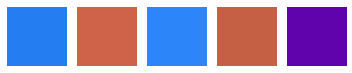

In [15]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])    

# Build the Model

To classify one object into three categories with the labels A,B, or C, last layer is made the Dense layer generate an output with a shape of (None, 3). Then we have used the cross_entropyloss function to calculate the LOSS, automatically calculate the gradient, and do the back-propagation process.

In [0]:
model = Sequential( [Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    Dropout(0.1),
    MaxPooling2D(2),
    Dropout(0.1),
    Flatten(),
    Dense(units=64, activation = 'relu'),
    Dense(3, activation='softmax')])

# Compile the model
For this tutorial, choose the ADAM optimizer and binary cross entropy loss function. To view training and validation accuracy for each training epoch, pass the metrics argument.

In [0]:
INIT_LR=0.01
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

# Model summary
View all the layers of the network using the model's summary method:

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                100416    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

# Train the model
Used the fit_generator method of the ImageDataGenerator class to train the network.

In [0]:
total_train = 180 #30 of each color with 3 shades each
total_val = 60 #20 of each color * no. of colors

In [20]:
tf.config.experimental_run_functions_eagerly(True)
history= model.fit_generator(train_data_gen, validation_data=val_data_gen, epochs=epochs,steps_per_epoch=total_train // batch_size, validation_steps=total_val//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/8
6/6 [==============================] - 0s 38ms/step - loss: 1.1061 - accuracy: 0.3333 - val_loss: 1.0180 - val_accuracy: 0.3333
Epoch 2/8
6/6 [==============================] - 0s 37ms/step - loss: 0.9817 - accuracy: 0.5222 - val_loss: 0.9313 - val_accuracy: 0.8500
Epoch 3/8
6/6 [==============================] - 0s 43ms/step - loss: 0.8820 - accuracy: 0.9333 - val_loss: 0.8444 - val_accuracy: 1.0000
Epoch 4/8
6/6 [==============================] - 0s 35ms/step - loss: 0.7787 - accuracy: 0.9944 - val_loss: 0.7535 - val_accuracy: 1.0000
Epoch 5/8
6/6 [==============================] - 0s 37ms/step - loss: 0.6750 - accuracy: 1.0000 - val_loss: 0.6591 - val_accuracy: 1.0000
Epoch 6/8
6/6 [==============================] - 0s 39ms/step - loss: 0.5718 - accuracy: 1.0000 - val_loss: 0.5656 - val_accuracy: 1.0000
Epoch 7/8
6/6 [==============================] - 0s 36ms/step - loss: 0.4813 - accuracy: 1.0000 

About >95% Accuracy is obtained

# Visualize training results

To visualize the results after training the network.

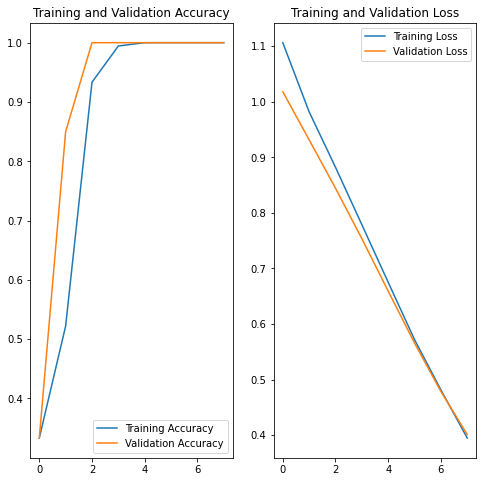

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# To Download dataset as Zip (Not needed to be run)

In [0]:
# !zip -r /content/train.zip /content/train/
# !zip -r /content/validation.zip /content/validation

In [0]:
# from google.colab import files
# files.download("/content/train.zip")
# files.download("/content/validation.zip")